In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cpi_df = pd.read_csv('data\BLS_Seafood_CPI.csv')
ppi_df = pd.read_csv('data\BLS_Seafood_PPI.csv')
#temp_df = pd.read_csv('data\US_temp.csv',encoding = "utf-8")
capture_df = pd.read_csv('data\FAO_Capture_data\Capture_Quantity.csv')
species_df = pd.read_csv('data\FAO_Capture_data\CL_FI_SPECIES_GROUPS.csv')

In [3]:
#Relable columns, group by year, remove unwanted columns for CPI and PPI dfs

In [4]:
cpi = cpi_df.groupby('Year').agg(mean_CPI=('Value', 'mean'))
cpi.head()

,mean_CPI
Year,
1935,6.175000
1936,6.200000
1937,6.325000
1938,6.358333
1939,6.333333


In [5]:
ppi = ppi_df.groupby('Year').agg(mean_PPI=('Value', 'mean'))
ppi.head()

,mean_PPI
Year,
1984,100.000000
1985,98.166667
1986,99.491667
1987,108.125000
1988,119.808333


In [6]:
# Clean Capture data, filter by US data

In [7]:
capture_df.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,MEASURE,PERIOD,VALUE,STATUS
0,4,FRF,4,Q_tlw,2020,2000.0,E
1,4,FRF,4,Q_tlw,2019,2100.0,E
2,4,FRF,4,Q_tlw,2018,2050.0,E
3,4,FRF,4,Q_tlw,2017,2000.0,E
4,4,FRF,4,Q_tlw,2016,1900.0,E


In [8]:
species_df.head()

,3A_Code,Taxonomic_Code,Identifier,Name_En,Name_Fr,Name_Es,Name_Ar,Name_Cn,Name_Ru,Scientific_Name,...,CPC_Class_Es,CPC_Class_Ar,CPC_Class_Cn,CPC_Class_Ru,CPC_Group_En,CPC_Group_Fr,CPC_Group_Es,CPC_Group_Ar,CPC_Group_Cn,CPC_Group_Ru
0,LAS,10201XXXXX,2000,Lampreys nei,Lamproies nca,Lampreas nep,NaN,NaN,Миноговые,Petromyzontidae,...,NaN,NaN,NaN,NaN,"Fish live, fresh or chilled for human consumption",NaN,NaN,NaN,NaN,NaN
1,LAR,1020100201,2002,River lamprey,Lamproie de rivière,Lamprea de río,NaN,NaN,Минога речная,Lampetra fluviatilis,...,NaN,NaN,NaN,NaN,"Fish live, fresh or chilled for human consumption",NaN,NaN,NaN,NaN,NaN
2,SBL,1050200201,2003,Bluntnose sixgill shark,Requin griset,Cañabota gris,NaN,NaN,NaN,Hexanchus griseus,...,NaN,NaN,NaN,NaN,"Fish live, fresh or chilled for human consumption",NaN,NaN,NaN,NaN,NaN
3,NTC,1050200502,2004,Broadnose sevengill shark,Platnez,Cañabota gata,NaN,NaN,NaN,Notorynchus cepedianus,...,NaN,NaN,NaN,NaN,"Fish live, fresh or chilled for human consumption",NaN,NaN,NaN,NaN,NaN
4,BSK,1060100301,2005,Basking shark,Pèlerin,Peregrino,NaN,NaN,Акула гигантская,Cetorhinus maximus,...,NaN,NaN,NaN,NaN,"Fish live, fresh or chilled for human consumption",NaN,NaN,NaN,NaN,NaN


In [9]:
species_df['SPECIES.ALPHA_3_CODE'] = species_df['3A_Code']

In [10]:
#filter to only the USA
capture = capture_df[(capture_df['COUNTRY.UN_CODE'] == 840)]
capture

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,MEASURE,PERIOD,VALUE,STATUS
956473,840,CTM,2,Q_tlw,2018,15.0,NaN
956474,840,CTM,2,Q_tlw,2017,24.0,NaN
956475,840,CTM,2,Q_tlw,2016,27.0,NaN
956476,840,CTM,2,Q_tlw,2015,21.0,NaN
956477,840,CTM,2,Q_tlw,2014,22.0,NaN
...,...,...,...,...,...,...,...
997606,840,SWG,77,Q_tlw,1999,0.0,NaN
997607,840,SWG,77,Q_tlw,1998,0.0,NaN
997608,840,SWG,77,Q_tlw,1997,0.0,NaN
997609,840,SWG,77,Q_tlw,1996,0.0,NaN


In [11]:
# merge species dictionary df with the capture quantity data
capture = pd.merge(capture, species_df, how='left', on=['SPECIES.ALPHA_3_CODE'])

In [12]:
capture_by_spec = capture.pivot_table(index='PERIOD',columns='Name_En',values='VALUE')
capture_by_spec

Name_En,Abalones nei,Acadian redfish,African pompano,Alaska pollock(=Walleye poll.),Albacore,Alewife,Alfonsino,Alligator gar,Amberjacks nei,Amer. plaice(=Long rough dab),...,Yellowfin notie,Yellowfin sole,Yellowfin tuna,Yellowhead jawfish,Yellowmouth grouper,Yellowmouth rockfish,Yellowtail amberjack,Yellowtail flounder,Yellowtail rockfish,Yellowtail snapper
PERIOD,,,,,,,,,,,,,,,,,,,,,
1950,1795.0,NaN,0.0,NaN,16423.5,10733.5,NaN,NaN,10.0,3082.0,...,NaN,NaN,42613.000000,NaN,NaN,NaN,1601.0,10938.0,NaN,157.0
1951,1850.0,NaN,0.0,NaN,7822.5,13085.5,NaN,NaN,11.5,5154.0,...,NaN,NaN,24468.333333,NaN,NaN,NaN,2118.0,8360.0,NaN,198.0
1952,2170.0,NaN,0.0,NaN,11920.0,10515.0,NaN,NaN,19.0,3467.0,...,NaN,NaN,27099.666667,NaN,NaN,NaN,4285.0,7705.0,NaN,177.0
1953,2140.0,NaN,0.0,NaN,7869.5,11614.5,NaN,NaN,18.0,2708.0,...,NaN,NaN,30241.500000,NaN,NaN,NaN,2364.0,6248.0,NaN,158.0
1954,1860.0,NaN,0.0,NaN,6123.0,11844.5,NaN,NaN,25.0,2590.0,...,NaN,NaN,27083.500000,NaN,NaN,NaN,752.0,5789.0,NaN,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,3889.0,2.5,1521860.0,2788.5,2.0,NaN,201.0,1.0,1113.0,...,NaN,131204.0,4116.600000,2.0,0.0,2.0,26.0,1351.0,1411.0,527.5
2017,NaN,5159.0,4.0,1537067.0,1580.4,0.0,0.0,284.0,1.0,1228.0,...,NaN,128667.0,6871.200000,1.0,0.0,6.0,30.0,1089.0,2715.0,642.0
2018,NaN,4492.0,3.5,1525871.0,1655.4,0.0,NaN,270.0,0.5,898.0,...,NaN,127332.0,4769.500000,2.0,0.5,25.0,19.0,445.0,3217.0,451.0


In [13]:
#replace na values with zeros
capture_by_spec.fillna(0)

Name_En,Abalones nei,Acadian redfish,African pompano,Alaska pollock(=Walleye poll.),Albacore,Alewife,Alfonsino,Alligator gar,Amberjacks nei,Amer. plaice(=Long rough dab),...,Yellowfin notie,Yellowfin sole,Yellowfin tuna,Yellowhead jawfish,Yellowmouth grouper,Yellowmouth rockfish,Yellowtail amberjack,Yellowtail flounder,Yellowtail rockfish,Yellowtail snapper
PERIOD,,,,,,,,,,,,,,,,,,,,,
1950,1795.0,0.0,0.0,0.0,16423.5,10733.5,0.0,0.0,10.0,3082.0,...,0.0,0.0,42613.000000,0.0,0.0,0.0,1601.0,10938.0,0.0,157.0
1951,1850.0,0.0,0.0,0.0,7822.5,13085.5,0.0,0.0,11.5,5154.0,...,0.0,0.0,24468.333333,0.0,0.0,0.0,2118.0,8360.0,0.0,198.0
1952,2170.0,0.0,0.0,0.0,11920.0,10515.0,0.0,0.0,19.0,3467.0,...,0.0,0.0,27099.666667,0.0,0.0,0.0,4285.0,7705.0,0.0,177.0
1953,2140.0,0.0,0.0,0.0,7869.5,11614.5,0.0,0.0,18.0,2708.0,...,0.0,0.0,30241.500000,0.0,0.0,0.0,2364.0,6248.0,0.0,158.0
1954,1860.0,0.0,0.0,0.0,6123.0,11844.5,0.0,0.0,25.0,2590.0,...,0.0,0.0,27083.500000,0.0,0.0,0.0,752.0,5789.0,0.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.0,3889.0,2.5,1521860.0,2788.5,2.0,0.0,201.0,1.0,1113.0,...,0.0,131204.0,4116.600000,2.0,0.0,2.0,26.0,1351.0,1411.0,527.5
2017,0.0,5159.0,4.0,1537067.0,1580.4,0.0,0.0,284.0,1.0,1228.0,...,0.0,128667.0,6871.200000,1.0,0.0,6.0,30.0,1089.0,2715.0,642.0
2018,0.0,4492.0,3.5,1525871.0,1655.4,0.0,0.0,270.0,0.5,898.0,...,0.0,127332.0,4769.500000,2.0,0.5,25.0,19.0,445.0,3217.0,451.0


In [14]:
# A look at fish species capture quantities

In [15]:
# Filter most common species types, remove zero values and sort descending by total sum
species_usa = capture_by_spec.sum(axis=0).sort_values(ascending=False)
species_usa = species_usa[(species_usa > 10)]
species_usa.head(10)

Name_En
Alaska pollock(=Walleye poll.)    4.830582e+07
Gulf menhaden                     3.740861e+07
Atlantic menhaden                 1.385119e+07
American alligator                1.033169e+07
Pacific cod                       9.134201e+06
Atlantic surf clam                8.300360e+06
American sea scallop              6.825747e+06
North Pacific hake                6.451522e+06
Pink(=Humpback) salmon            5.735204e+06
Ocean quahog                      5.057766e+06
dtype: float64

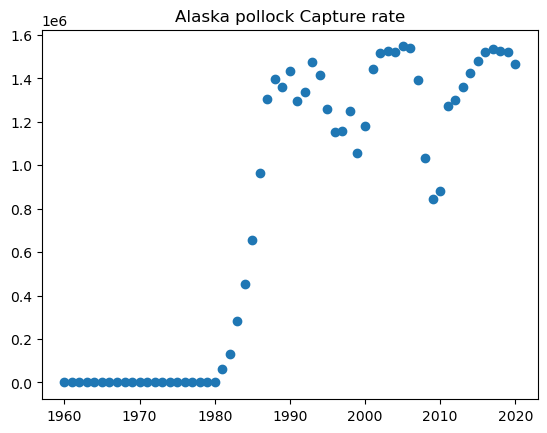

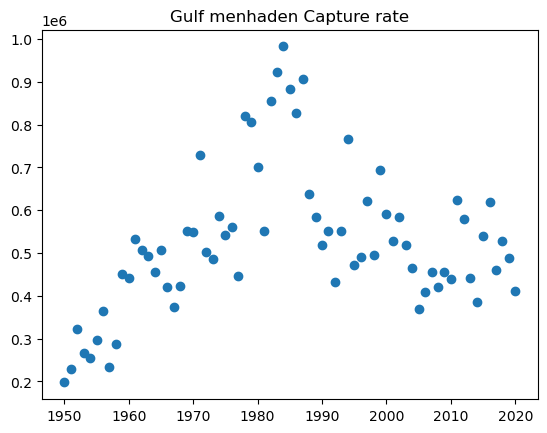

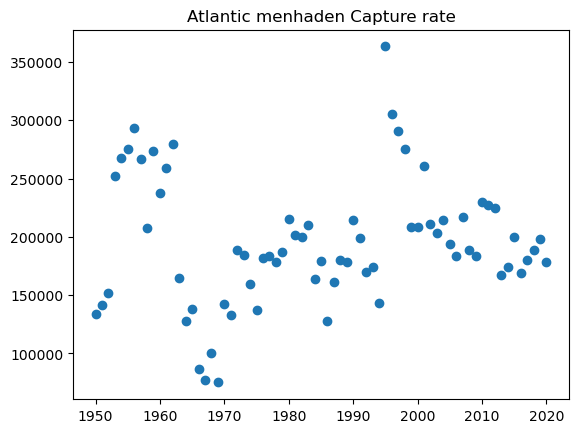

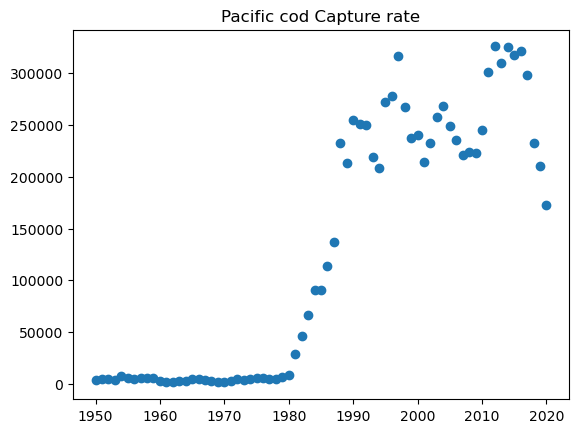

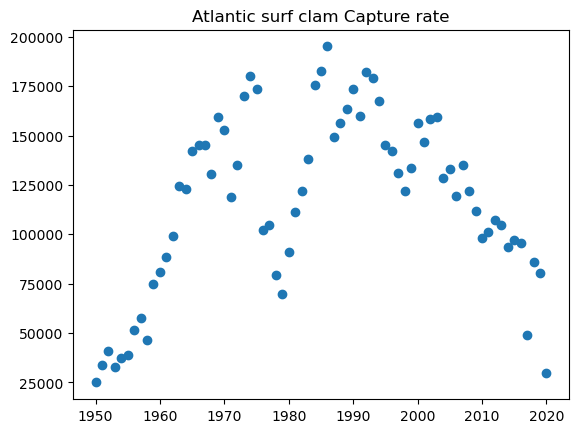

In [16]:
# Creates plots of top species capture rates over time

ax = plt.subplot()
plt.scatter(x=capture_by_spec.index,y=capture_by_spec['Alaska pollock(=Walleye poll.)'])
plt.title('Alaska pollock Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_spec.index,y=capture_by_spec['Gulf menhaden'])
plt.title('Gulf menhaden Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_spec.index,y=capture_by_spec['Atlantic menhaden'])
plt.title('Atlantic menhaden Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_spec.index,y=capture_by_spec['Pacific cod'])
plt.title('Pacific cod Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_spec.index,y=capture_by_spec['Atlantic surf clam'])
plt.title('Atlantic surf clam Capture rate')
plt.show()

In [17]:
# Plot by species groupings

capture_by_group = capture.pivot_table(index='PERIOD',columns='Major_Group_En',values='VALUE')
capture_by_group

Major_Group_En,"AMPHIBIA, REPTILIA",CRUSTACEA,INVERTEBRATA AQUATICA,MAMMALIA,MOLLUSCA,PISCES,PLANTAE AQUATICAE
PERIOD,,,,,,,
1950,316.6,9864.941176,88.322222,3344.666667,18205.666667,7320.584314,50788.50
1951,304.0,9932.888889,52.188889,3387.555556,17669.925926,6530.910506,57999.00
1952,93.2,9635.444444,54.777778,3548.333333,17679.714286,6583.206226,55626.00
1953,67.6,10756.055556,36.333333,3703.833333,17846.607143,6743.885827,63586.50
1954,46.8,10755.333333,30.777778,3549.000000,16473.214286,7248.035573,53464.50
...,...,...,...,...,...,...,...
2016,276695.5,6091.508475,332.083333,15.098361,6117.696970,7049.773356,1260.50
2017,231746.0,5577.864407,319.550000,8.147541,7569.812500,7210.219178,707.75
2018,298136.5,6064.250000,243.739130,14.721311,6878.808824,6732.991540,2634.25


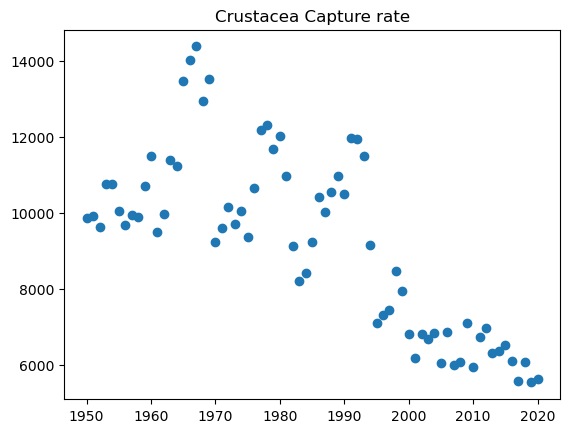

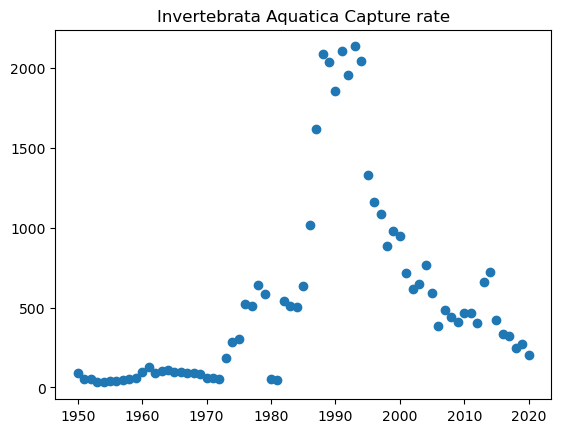

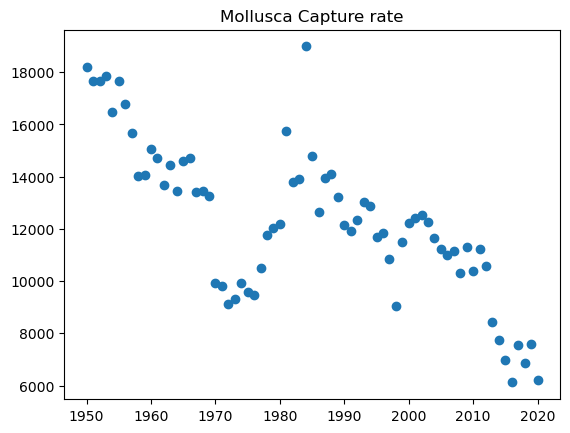

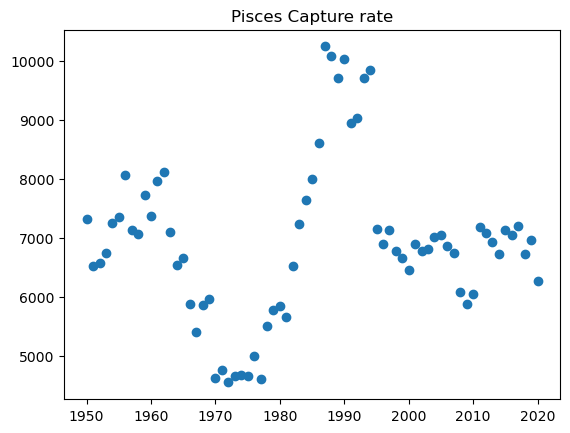

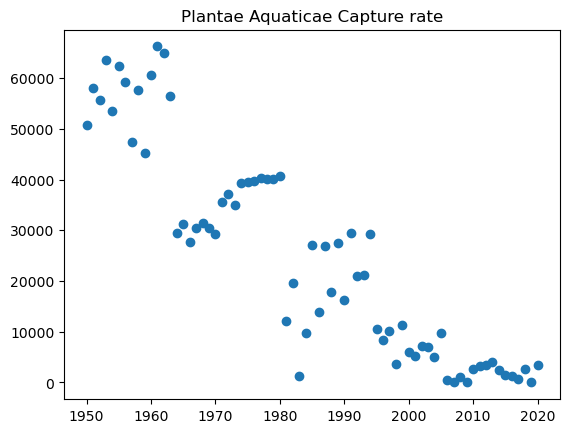

In [18]:
ax = plt.subplot()
plt.scatter(x=capture_by_group.index,y=capture_by_group['CRUSTACEA'])
plt.title('Crustacea Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_group.index,y=capture_by_group['INVERTEBRATA AQUATICA'])
plt.title('Invertebrata Aquatica Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_group.index,y=capture_by_group['MOLLUSCA'])
plt.title('Mollusca Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_group.index,y=capture_by_group['PISCES'])
plt.title('Pisces Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture_by_group.index,y=capture_by_group['PLANTAE AQUATICAE'])
plt.title('Plantae Aquaticae Capture rate')
plt.show()

In [19]:
# Export to csv

In [21]:
#capture_by_group.to_csv('Major_group_by_year.csv', index=True)

In [23]:
#capture_by_spec.to_csv('species_by_year.csv', index=True)